In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from pandas import read_csv
from wordcloud import WordCloud
pd.set_option('display.max_rows', None)

In [2]:
# Load all required data files: DEMO data
patients = pd.read_csv("C:\\Users\\harsh\\Desktop\\................................\\AI4H_UT\\Demo\\PATIENTS.csv")
admissions = pd.read_csv("C:\\Users\\harsh\\Desktop\\...............................\\AI4H_UT\\Demo\\ADMISSIONS.csv")
prescriptions = pd.read_csv("C:\\Users\\harsh\\Desktop\\.............................\\AI4H_UT\\Demo\\PRESCRIPTIONS.csv")
microbiologyevents = pd.read_csv("C:\\Users\\harsh\\Desktop\\.........................\\AI4H_UT\\Demo\\MICROBIOLOGYEVENTS.csv")

In [3]:
from datetime import datetime
df = patients
# Calculate age function
def calculate_age(dob, dod):
    dob_date = datetime.strptime(dob, "%Y-%m-%d %H:%M:%S")
    dod_date = datetime.strptime(dod, "%Y-%m-%d %H:%M:%S")
    age = (dod_date - dob_date).days // 365
    return age

# Apply calculate_age function to create "age" column
df["age"] = df.apply(lambda row: calculate_age(row["dob"], row["dod"]), axis=1)
df = df[df["age"] < 120]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 99
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_id       92 non-null     int64 
 1   subject_id   92 non-null     int64 
 2   gender       92 non-null     object
 3   dob          92 non-null     object
 4   dod          92 non-null     object
 5   dod_hosp     63 non-null     object
 6   dod_ssn      72 non-null     object
 7   expire_flag  92 non-null     int64 
 8   age          92 non-null     int64 
dtypes: int64(4), object(5)
memory usage: 7.2+ KB


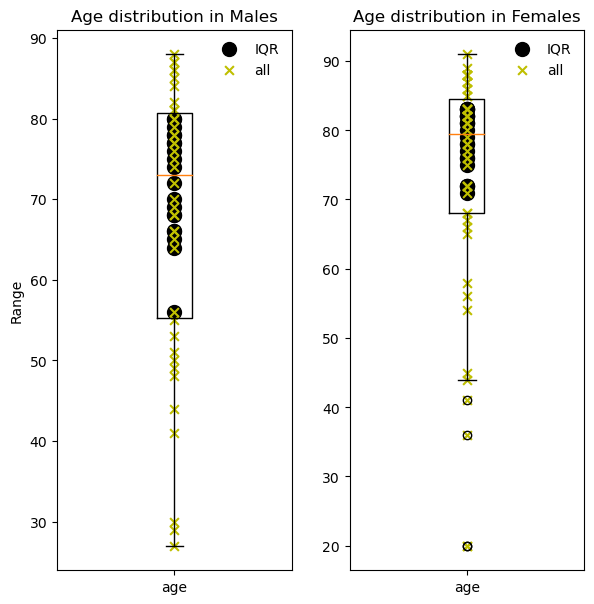

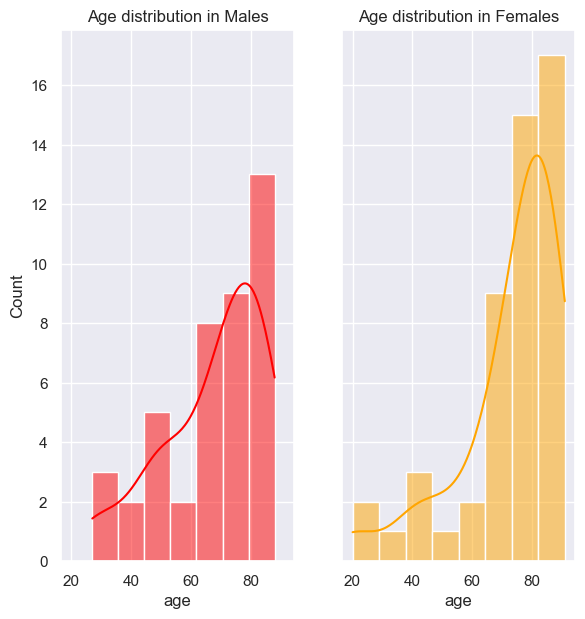

In [4]:
# Boxplot and histplot visualization for age based on gender.
# Anything which falls inside Interquartile range is marked with a black circle.

# Male data
data_M = df[df['gender']=='M']
age_data_M = data_M[data_M['age'].notna()]['age']

# Male data in IQR range
data_iqr_M = age_data_M[ (age_data_M >  np.percentile(age_data_M, 25)) & (age_data_M <  np.percentile(age_data_M, 75)) ]

# Female data
data_F = df[df['gender']=='F']
age_data_F = data_F[data_F['age'].notna()]['age']

# Female data in IQR range
data_iqr_F = age_data_F[ (age_data_F >  np.percentile(age_data_F, 25)) & (age_data_F <  np.percentile(age_data_F, 75)) ]


fig, axs = plt.subplots(1, 2, figsize=(6, 6))
fig.tight_layout()
labels = ['age']
# Creating plot for males
axs[0].boxplot(age_data_M, labels = labels)
axs[0].scatter(np.ones_like(data_iqr_M), data_iqr_M,  s=100, c='k', marker='o', label='IQR')
axs[0].scatter(np.ones_like(age_data_M),     age_data_M, s= 40,  c='y',  marker='x', label='all')
axs[0].legend(frameon=False, loc='best')
axs[0].set_title("Age distribution in Males") 
axs[0].set_ylabel("Range")

# Creating plot for females
axs[1].boxplot(age_data_F, labels = labels)
axs[1].scatter(np.ones_like(data_iqr_F), data_iqr_F,  s=100, c='k', marker='o', label='IQR')
axs[1].scatter(np.ones_like(age_data_F), age_data_F, s= 40,  c='y',  marker='x', label='all')
axs[1].legend(frameon=False, loc='best')
axs[1].set_title("Age distribution in Females") 
# show plot
plt.show()

## Hist plots
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 2, figsize=(6, 6), sharex=True, sharey=True)
fig.tight_layout() 

sns.histplot(x=age_data_M, color="red", kde=True, ax=axs[0])
sns.histplot(x=age_data_F, color="orange", kde=True, ax=axs[1])
axs[0].set_title("Age distribution in Males")
axs[1].set_title("Age distribution in Females")

plt.show()

In [5]:
# Merge prescriptions and patients data on subject_id
merged_data = pd.merge(prescriptions, df, on="subject_id")
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9946 entries, 0 to 9945
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   row_id_x           9946 non-null   int64  
 1   subject_id         9946 non-null   int64  
 2   hadm_id            9946 non-null   int64  
 3   icustay_id         6757 non-null   float64
 4   startdate          9946 non-null   object 
 5   enddate            9945 non-null   object 
 6   drug_type          9946 non-null   object 
 7   drug               9946 non-null   object 
 8   drug_name_poe      5506 non-null   object 
 9   drug_name_generic  5512 non-null   object 
 10  formulary_drug_cd  9945 non-null   object 
 11  gsn                8734 non-null   float64
 12  ndc                9945 non-null   float64
 13  prod_strength      9946 non-null   object 
 14  dose_val_rx        9946 non-null   object 
 15  dose_unit_rx       9946 non-null   object 
 16  form_val_disp      9946 

In [6]:
merged_data['drug_type'].value_counts()

MAIN        7371
BASE        2503
ADDITIVE      72
Name: drug_type, dtype: int64

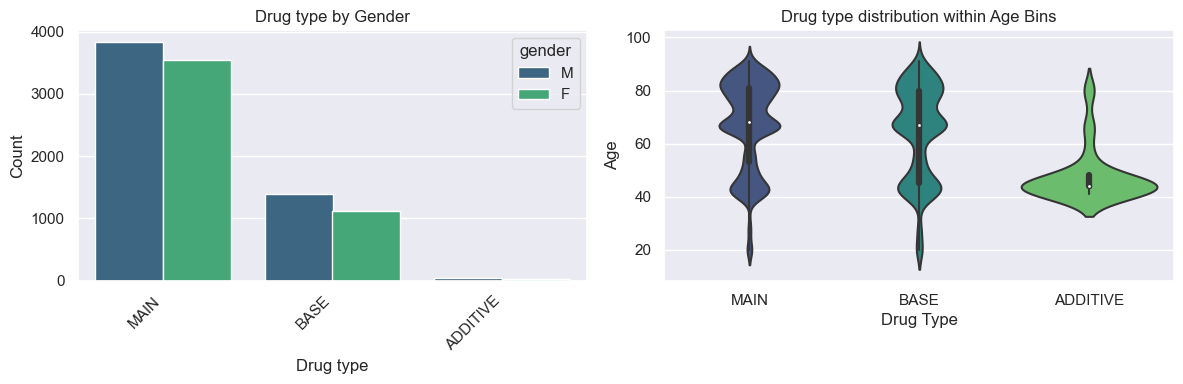

In [7]:
# Analysis: Count plot and violin plot of "'drug_type" by Gender

# Create a figure with two subplots
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(data=merged_data, x='drug_type', hue='gender',  palette='viridis')
plt.title("Drug type by Gender")
plt.xlabel("Drug type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')

# Second subplot - Drug type distribution within each age bin
plt.subplot(1, 2, 2)
sns.violinplot(data=merged_data, x='drug_type', y='age', inner='box',  palette='viridis')
plt.title("Drug type distribution within Age Bins")
plt.xlabel("Drug Type")
plt.ylabel("Age")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [8]:
# Merge admissions, prescriptions, and patients data on subject_id
merged_data = pd.merge(admissions, merged_data, on="subject_id")
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29115 entries, 0 to 29114
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   row_id                29115 non-null  int64  
 1   subject_id            29115 non-null  int64  
 2   hadm_id_x             29115 non-null  int64  
 3   admittime             29115 non-null  object 
 4   dischtime             29115 non-null  object 
 5   deathtime             4426 non-null   object 
 6   admission_type        29115 non-null  object 
 7   admission_location    29115 non-null  object 
 8   discharge_location    29115 non-null  object 
 9   insurance             29115 non-null  object 
 10  language              25331 non-null  object 
 11  religion              29115 non-null  object 
 12  marital_status        28514 non-null  object 
 13  ethnicity             29115 non-null  object 
 14  edregtime             23728 non-null  object 
 15  edouttime          

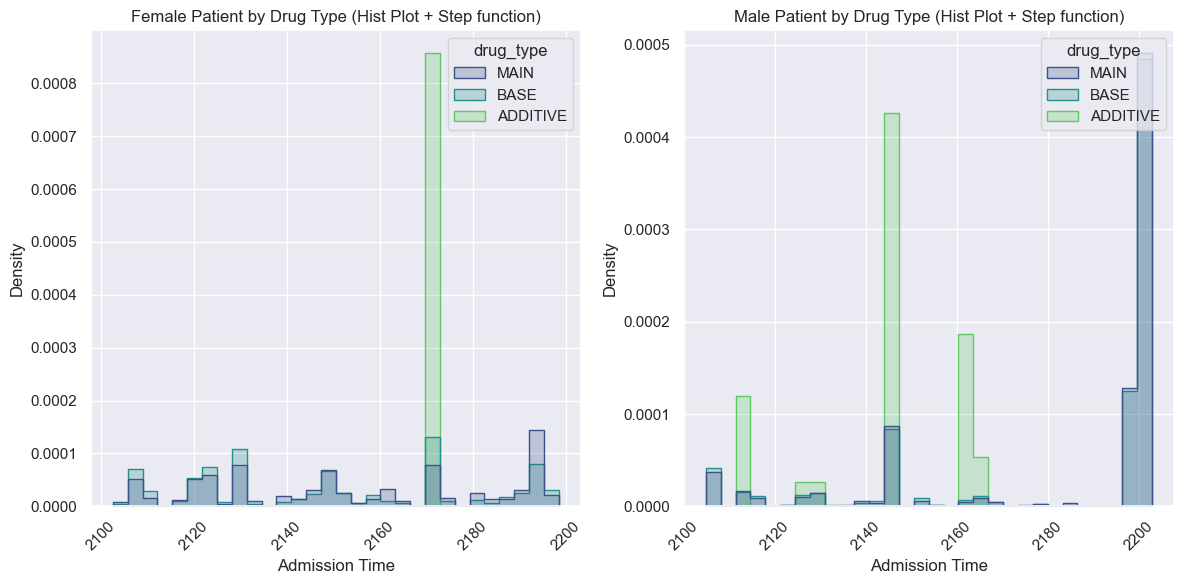

In [9]:
merged_data['admittime'] = pd.to_datetime(merged_data['admittime'])  # Convert to datetime

# Filter data for male and female patients
male_data = merged_data[merged_data['gender'] == 'M']
female_data = merged_data[merged_data['gender'] == 'F']

# Create separate Hist Plots for male and female patients with a step function
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(female_data, x="admittime", hue="drug_type", kde=False, stat="density", common_norm=False, palette='viridis', bins=30,element="step")
plt.xlabel('Admission Time')
plt.ylabel('Density')
plt.title('Female Patient by Drug Type (Hist Plot + Step function)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.histplot(male_data, x="admittime", hue="drug_type", kde=False, stat="density", common_norm=False, palette='viridis', bins=30,element="step")
plt.xlabel('Admission Time')
plt.ylabel('Density')
plt.title('Male Patient by Drug Type (Hist Plot + Step function)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [10]:
merged_data['drug'].value_counts()

0.9% Sodium Chloride                         1742
Potassium Chloride                           1291
Insulin                                       947
5% Dextrose                                   895
Iso-Osmotic Dextrose                          787
D5W                                           632
Furosemide                                    630
Sodium Chloride 0.9%  Flush                   620
Magnesium Sulfate                             615
SW                                            592
Warfarin                                      544
NS                                            509
Vancomycin                                    493
Morphine Sulfate                              489
Gabapentin                                    486
0.9% Sodium Chloride (Mini Bag Plus)          484
Calcium Gluconate                             434
Acetaminophen                                 432
Neutra-Phos                                   415
Fentanyl Patch                                365


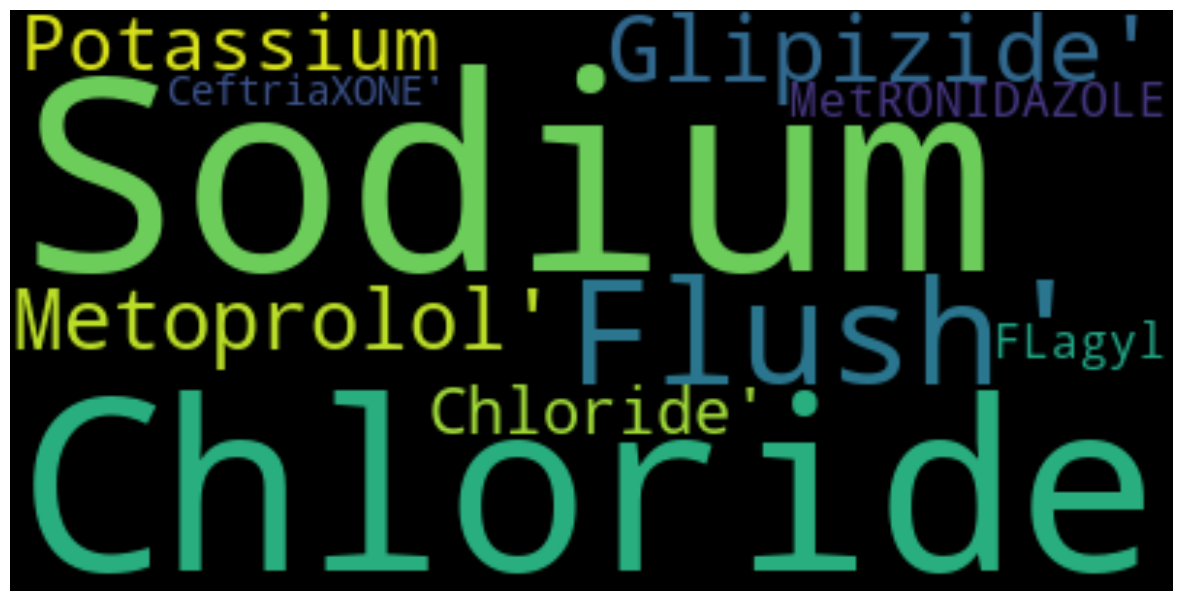

In [11]:
# wordcloud visualization 
text = str(merged_data['drug'].values)
wordcloud = WordCloud().generate(text)
plt.figure(figsize = (15,15))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [12]:
merged_data['discharge_location'].value_counts()

SNF                          15660
DEAD/EXPIRED                  4426
ICF                           3474
REHAB/DISTINCT PART HOSP      2042
LONG TERM CARE HOSPITAL       1291
HOME HEALTH CARE              1034
HOME                          1017
HOSPICE-HOME                    98
HOME WITH HOME IV PROVIDR       41
DISCH-TRAN TO PSYCH HOSP        32
Name: discharge_location, dtype: int64

In [13]:
merged_data['insurance'].value_counts()

Medicare      24480
Private        3056
Medicaid       1549
Government       30
Name: insurance, dtype: int64

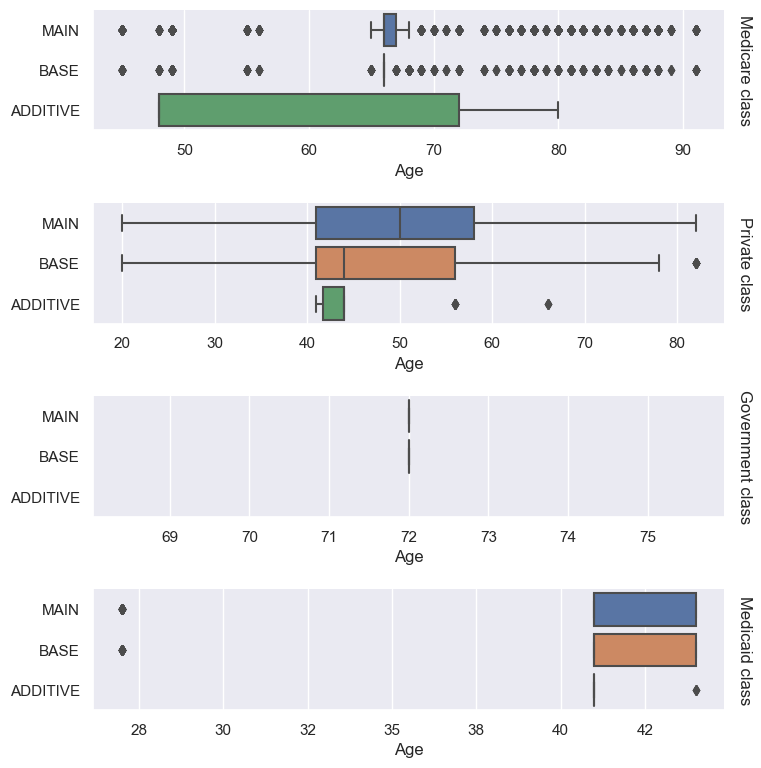

In [14]:
## catplot visualization of Age with Drug type and Insurance class
g = sns.catplot(
    data=merged_data,
    x="age", y="drug_type", row="insurance",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=2, aspect=4,
)
g.set(xlabel="Age", ylabel="")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('{x:.0f}')

In [15]:
# Merge microbiologyevents, admissions, prescriptions, and patients data on subject_id
merged_data = pd.merge(microbiologyevents, merged_data, on="subject_id")
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6710965 entries, 0 to 6710964
Data columns (total 60 columns):
 #   Column                Dtype         
---  ------                -----         
 0   row_id_x              int64         
 1   subject_id            int64         
 2   hadm_id               int64         
 3   chartdate             object        
 4   charttime             object        
 5   spec_itemid           int64         
 6   spec_type_desc        object        
 7   org_itemid            float64       
 8   org_name              object        
 9   isolate_num           float64       
 10  ab_itemid             float64       
 11  ab_name               object        
 12  dilution_text         object        
 13  dilution_comparison   object        
 14  dilution_value        float64       
 15  interpretation        object        
 16  row_id_y              int64         
 17  hadm_id_x             int64         
 18  admittime             datetime64[ns]
 19  

In [16]:
merged_data['interpretation'].value_counts()
#INTERPRETATION of the antibiotic sensitivity, and indicates the results of the test. 
# “S” is sensitive, “R” is resistant, “I” is intermediate, and “P” is pending.

S    2535830
R    1599413
I     457178
Name: interpretation, dtype: int64

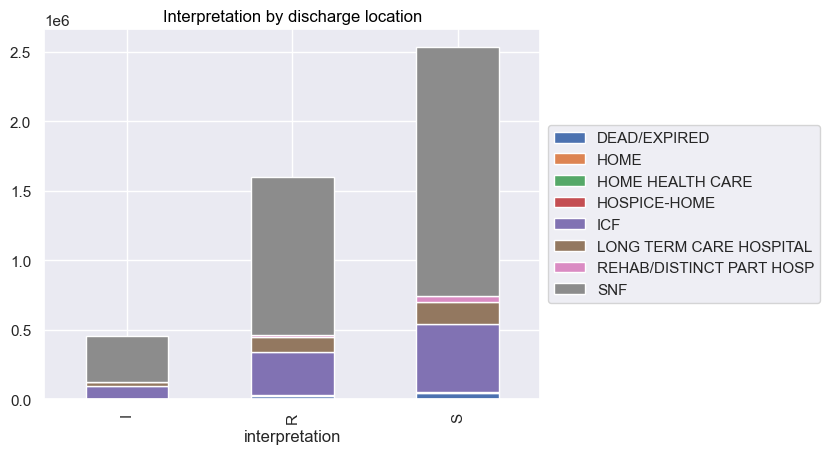

In [17]:
# Stacked barplot visualization of Interpretation by discharge location
pd.crosstab(merged_data['interpretation'],merged_data['discharge_location']).plot(kind="bar",stacked=True)
plt.title('Interpretation by discharge location', color='black')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))